<a href="https://colab.research.google.com/github/ritwikraha/computer-needs-glasses/blob/master/image-multimodal-models/pdf_extractor_ocr_gpt4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q paddlepaddle paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.0/780.0 kB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 102.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (set

In [ ]:
!pip install -q pdf2image
!apt-get install -q poppler-utils
!sudo apt install -y -q tesseract-ocr
!pip install  -q pytesseract transformers datasets

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Fetched 186 kB in 1s (291 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.4_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.4) ...
Setting up poppler-utils (22.02.0-2ubuntu0.4) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will

In [ ]:
!pip install -q openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 6.6 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
from pdf2image import convert_from_path
from google.colab import files
from google.colab import userdata
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
import openai
import requests
import base64
import json

In [ ]:
def upload_pdf_files():
    uploaded = files.upload()
    for name, data in uploaded.items():
        with open(name, 'wb') as f:
            f.write(data)
        print(f"Uploaded file '{name}'")
    return list(uploaded.keys())

In [ ]:
pdf_files = upload_pdf_files()

Saving W2 Summary.pdf to W2 Summary.pdf
Uploaded file 'W2 Summary.pdf'


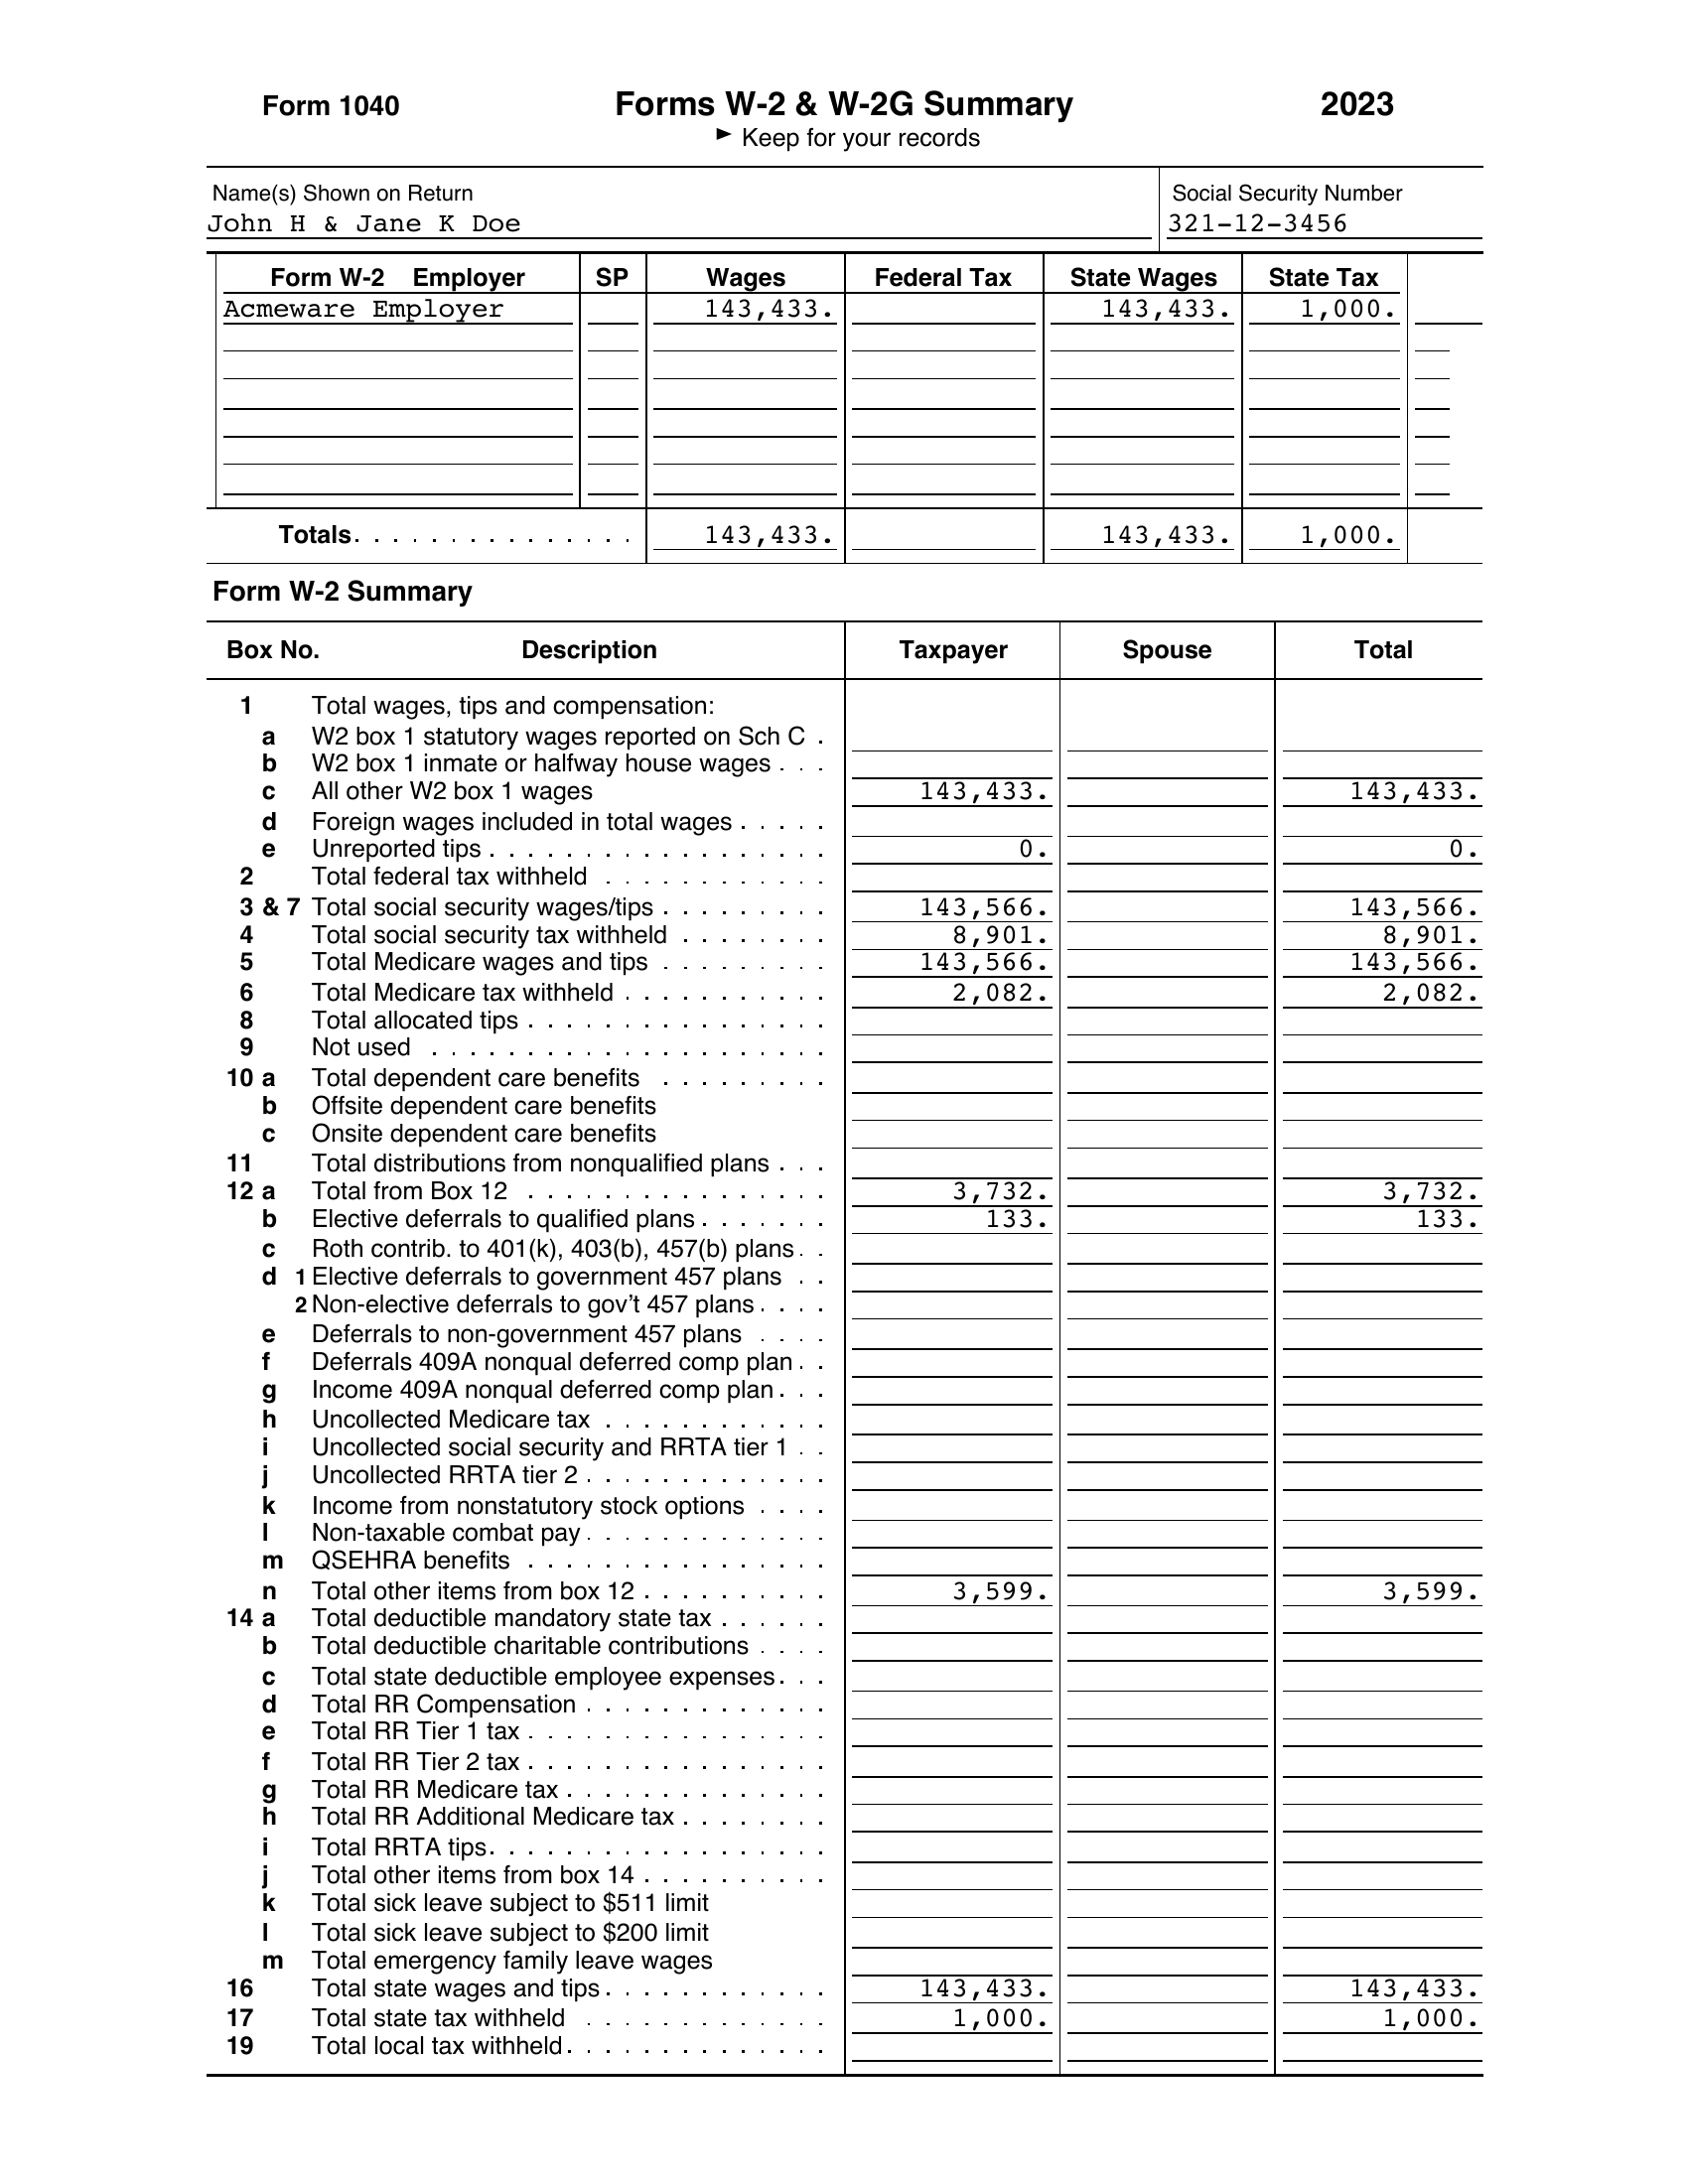

In [ ]:
if pdf_files:
    for pdf_file in pdf_files:
        # Ensure the file is a PDF
        if pdf_file.endswith('.pdf'):
            # Convert PDF to images
            images = convert_from_path(pdf_file, dpi=200)  # Adjust dpi according to your needs
            # Save or display images
            for i, image in enumerate(images):
                image.save(f'{pdf_file[:-4]}_page_{i + 1}.png', 'PNG')
                display(image)  # Display the image in Colab
        else:
            print(f"File {pdf_file} is not a PDF.")
else:
    print("No PDF file uploaded.")

In [ ]:
# Initialize PaddleOCR with the language you want to use (here, English)
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Path to your image file
image_path = '/content/W2 Summary_page_1.png'

# Perform OCR on the image
result = ocr.ocr(image_path, cls=True)

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:15<00:00, 252kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:18<00:00, 565kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:13<00:00, 156kiB/s]

[2024/06/10 18:40:15] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

[2024/06/10 18:40:17] ppocr DEBUG: dt_boxes num : 144, elapsed : 0.3888561725616455
[2024/06/10 18:40:17] ppocr DEBUG: cls num  : 144, elapsed : 0.30127429962158203
[2024/06/10 18:40:24] ppocr DEBUG: rec_res num  : 144, elapsed : 6.634135007858276


In [ ]:
print(result)

[[[[[259.0, 89.0], [404.0, 89.0], [404.0, 121.0], [259.0, 121.0]], ('Form 1040', 0.9990291595458984)], [[[617.0, 87.0], [1081.0, 89.0], [1081.0, 122.0], [617.0, 119.0]], ('Forms W-2 & W-2G Summary', 0.988947868347168)], [[[1326.0, 87.0], [1407.0, 87.0], [1407.0, 121.0], [1326.0, 121.0]], ('2023', 0.9999426603317261)], [[[714.0, 119.0], [991.0, 122.0], [991.0, 154.0], [714.0, 151.0]], (' Keep for your records', 0.9976685047149658)], [[[208.0, 176.0], [481.0, 181.0], [480.0, 211.0], [208.0, 206.0]], ('Name(s) Shown on Return', 0.9974370002746582)], [[[1176.0, 179.0], [1416.0, 179.0], [1416.0, 209.0], [1176.0, 209.0]], ('Social Security Number', 0.9989925622940063)], [[[205.0, 211.0], [524.0, 208.0], [524.0, 238.0], [206.0, 241.0]], ('John H & Jane K Doe', 0.9982279539108276)], [[[1173.0, 209.0], [1360.0, 209.0], [1360.0, 238.0], [1173.0, 238.0]], ('321-12-3456', 0.998558759689331)], [[[412.0, 266.0], [529.0, 268.0], [529.0, 294.0], [411.0, 291.0]], ('Employer', 0.9998886585235596)], [[[5

In [ ]:
prompt = f"Extract only the text fields without the bounding boxes and confidence from the following string:\n\n{result}\n\nProvide the output as a JSON."

In [ ]:
from openai import OpenAI

In [ ]:
# Set the API key
client = OpenAI(api_key="")

In [ ]:
MODEL="gpt-4o"

completion = client.chat.completions.create(
  model=MODEL,
  messages=[
    {"role": "system", "content": "You are an assistant whose task is to convert a string to json with only the text values"},
    {"role": "user", "content": prompt}
  ]
)
print(completion.choices[0].message.content)

Here is the JSON output containing only the text values extracted from the provided string:

```json
{
  "text_values": [
    "Form 1040",
    "Forms W-2 & W-2G Summary",
    "2023",
    " Keep for your records",
    "Name(s) Shown on Return",
    "Social Security Number",
    "John H & Jane K Doe",
    "321-12-3456",
    "Employer",
    "SP",
    "Federal Tax",
    "State Wages",
    "State Tax",
    "Form W-2",
    "Wages",
    "Acmeware Employer",
    "143,433.",
    "143,433.",
    "1,000.",
    "Totals.",
    "143,433.",
    "143,433.",
    "1,000.",
    "Form w-2 Summary",
    "Box No.",
    "Description",
    "Taxpayer",
    "Spouse",
    "Total",
    "Total wages, tips and compensation:",
    "1",
    "a",
    "W2 box 1 statutory wages reported on Sch C",
    "w2 box 1 inmate or halfway house wages .",
    "6",
    "c",
    " All other w2 box 1 wages",
    "143,433.",
    "143,433.",
    "d",
    " Foreign wages included in total wages",
    "e",
    "0.",
    "0.",
    "2",
  